In [19]:
from sklearn.cluster import MeanShift
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt


In [34]:
X = np.array([[1, 1], [2, 1], [1, 0], [4, 7], [3, 5], [3, 6]])
clustering = MeanShift(bandwidth=2).fit(X)
clustering.labels_


{'bandwidth': 2,
 'bin_seeding': False,
 'cluster_all': True,
 'max_iter': 300,
 'min_bin_freq': 1,
 'n_jobs': None,
 'seeds': None}

In [13]:
clustering.predict([[0, 0], [5, 5]])

array([1, 0])

In [14]:
clustering

MeanShift(bandwidth=2)

In [253]:
lab_img = cv2.resize(cv2.cvtColor(imgs[9], cv2.COLOR_BGR2LAB), dsize=(0,0), fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)
img_l, img_a, img_b = cv2.split(lab_img)
img_shape = img_l.shape
X = np.array(list(zip(img_l.flatten(), img_a.flatten(), img_b.flatten())))
X.shape

(26969, 3)

In [ ]:
clustering = MeanShift(bandwidth=10).fit(X)

In [ ]:
label_cnt = max(list(set(clustering.labels_))) + 1
cluster_points = [[] for i in range(label_cnt)]
for p, l in zip(X, clustering.labels_):
    cluster_points[l].append(p)

clustering.labels_

cluster_means = [np.uint8(sum(np.array(points, np.int32)) / len(points)) for points in cluster_points]

# cluster_result = np.array([cluster_means[l] for l in clustering.labels_]).T
result = np.array([cluster_means[l] for l in clustering.labels_]).T
# .reshape(lab_img.shape)

len(cluster_means), label_cnt

cluster_means[0]

np.uint8(sum(np.array(cluster_points[0])) / len(cluster_points[0]))


lab_img.shape

img_l, img_a, img_b = [r.reshape(img_shape) for r in result]

fig=plt.figure(figsize=(14, 14))
columns = 2
rows = 1
bgr_original = cv2.cvtColor(lab_img, cv2.COLOR_LAB2RGB)
bgr_mean_shift = cv2.cvtColor(cv2.merge((
    img_l, 
    img_a, 
    img_b
)), cv2.COLOR_LAB2RGB)
ax = fig.add_subplot(rows, columns, 1)
ax.title.set_text("bgr_original")
plt.imshow(bgr_original)
ax = fig.add_subplot(rows, columns, 2)
ax.title.set_text("bgr_mean_shift")
plt.imshow(bgr_mean_shift)
# ax = fig.add_subplot(rows, columns, 3)
# ax.title.set_text("A")
# plt.imshow(img_a)
# ax = fig.add_subplot(rows, columns, 4)
# ax.title.set_text("B")
# plt.imshow(img_b)

In [30]:
def mean_shift_analyze(img, h=10):
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    img_l, img_a, img_b = cv2.split(lab_img)
    fig=plt.figure(figsize=(14, 14))
    columns = 2
    rows = 2
    bgr = cv2.cvtColor(cv2.merge((
        img_l, 
        img_a, 
        img_b
    )), cv2.COLOR_LAB2RGB)
    ax = fig.add_subplot(rows, columns, 1)
    ax.title.set_text("original")
    plt.imshow(bgr)
    ax = fig.add_subplot(rows, columns, 2)
    ax.title.set_text("L")
    plt.imshow(img_l)
    ax = fig.add_subplot(rows, columns, 3)
    ax.title.set_text("A")
    plt.imshow(img_a)
    ax = fig.add_subplot(rows, columns, 4)
    ax.title.set_text("B")
    plt.imshow(img_b)

In [31]:
file_names = os.listdir("colorful_img/")
imgs = []
for fn in file_names:
    img = cv2.imread("colorful_img/" + fn)
    imgs.append(img)

In [32]:
!ls colorful_img/

00.jpg	02.png	04.jpg	06.jpg	 08.jpg  10.jpg
01.png	03.png	05.jpg	07.jpeg  09.jpg


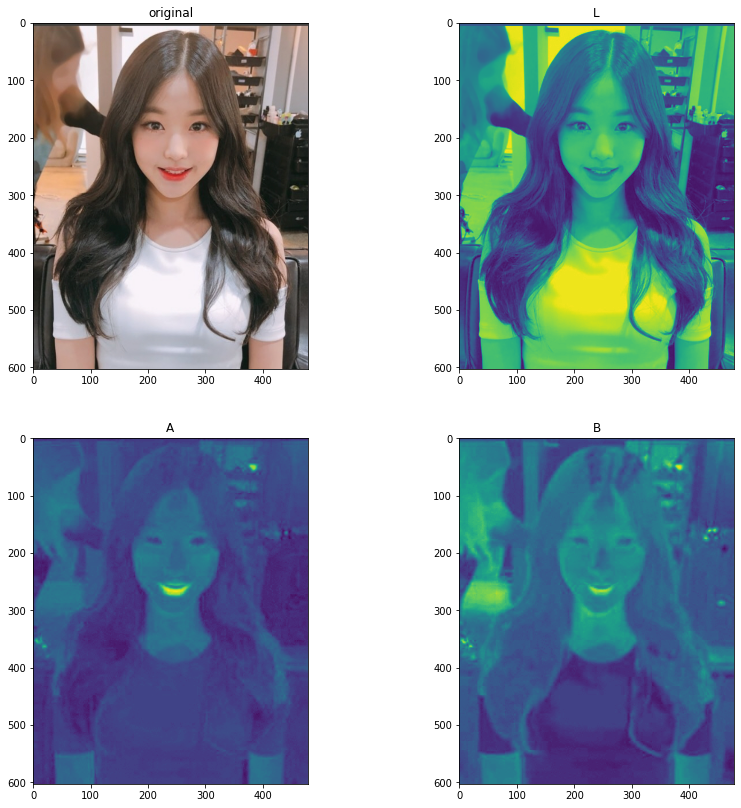

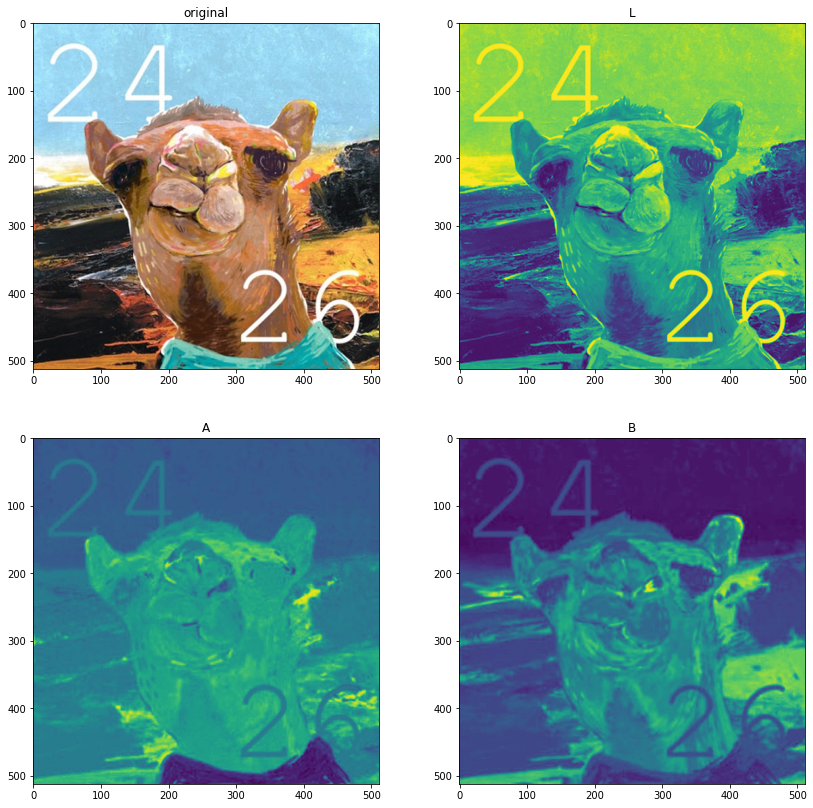

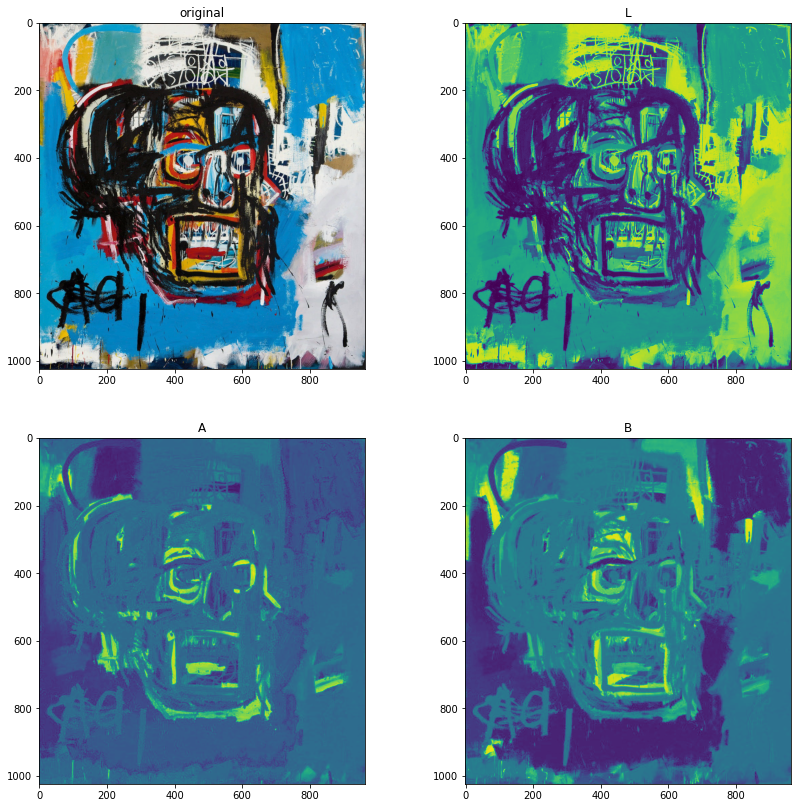

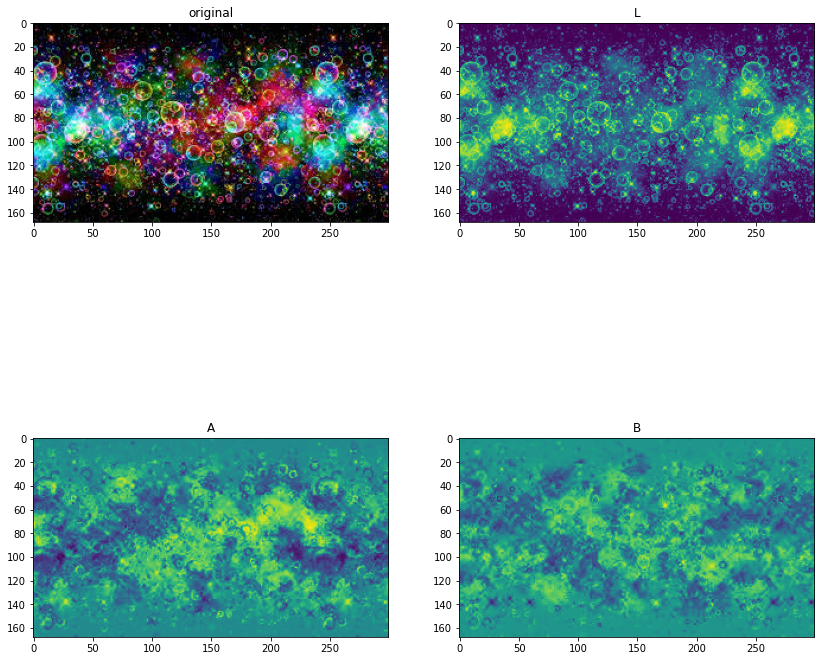

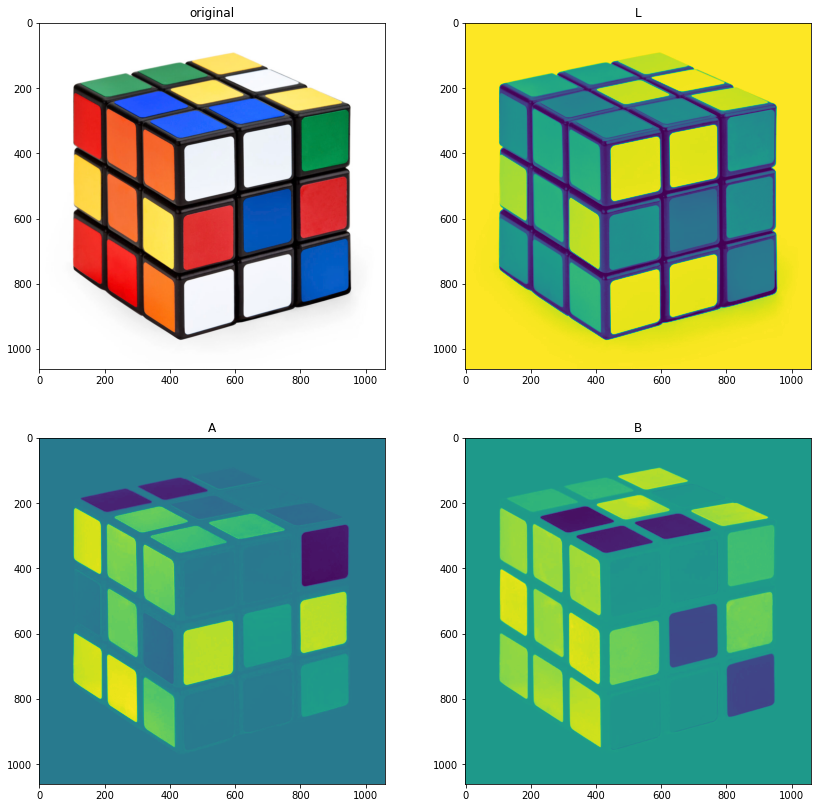

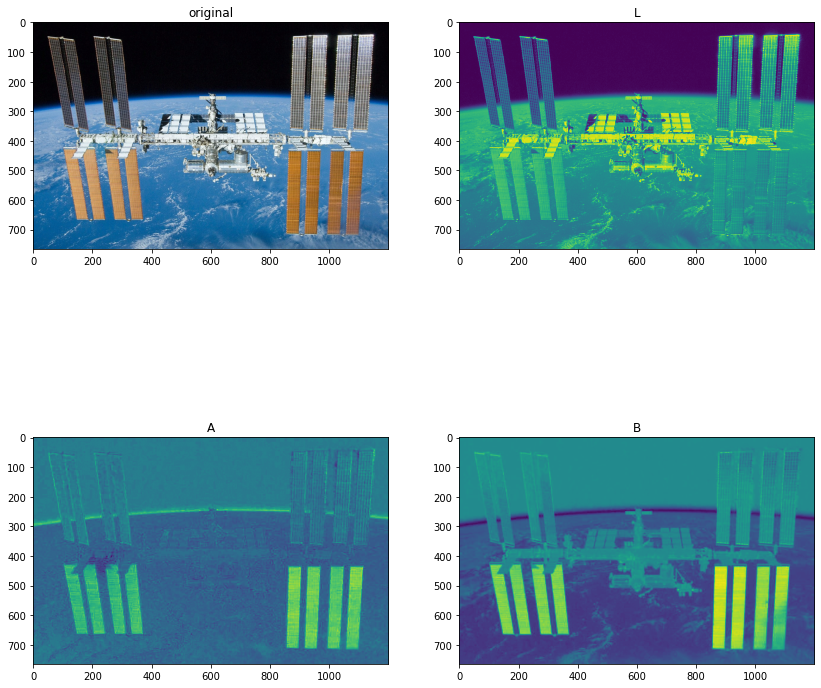

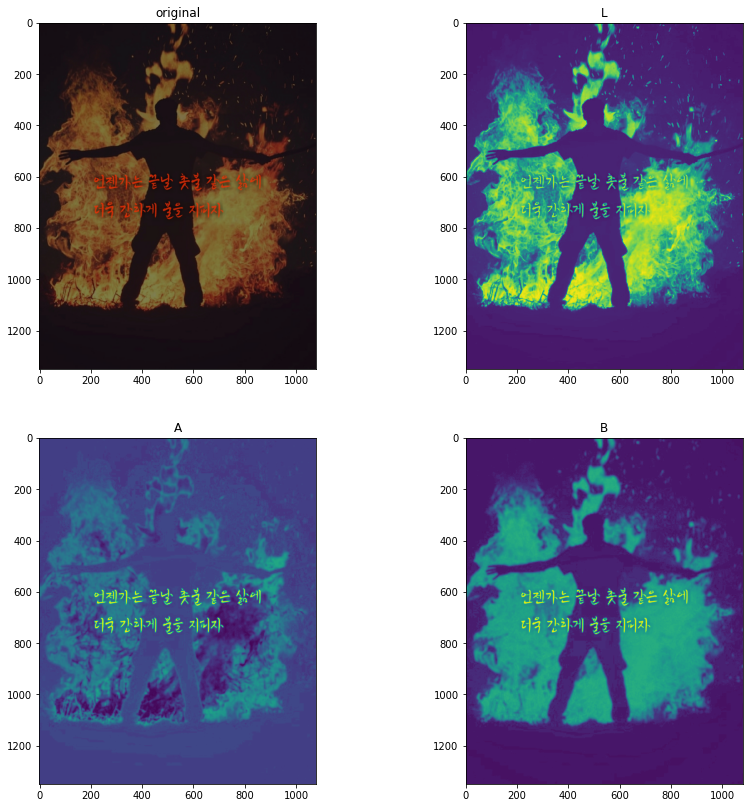

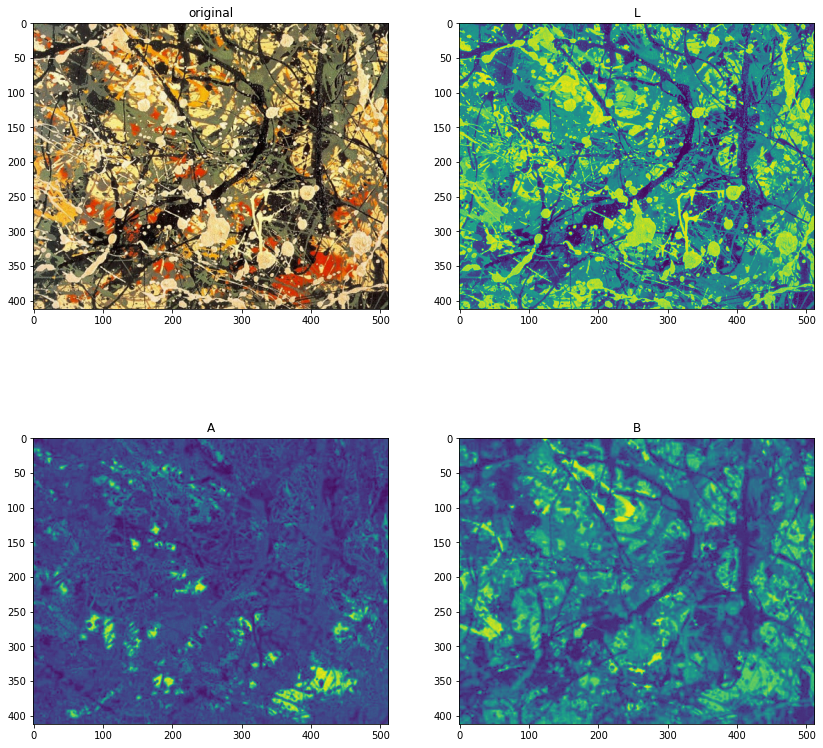

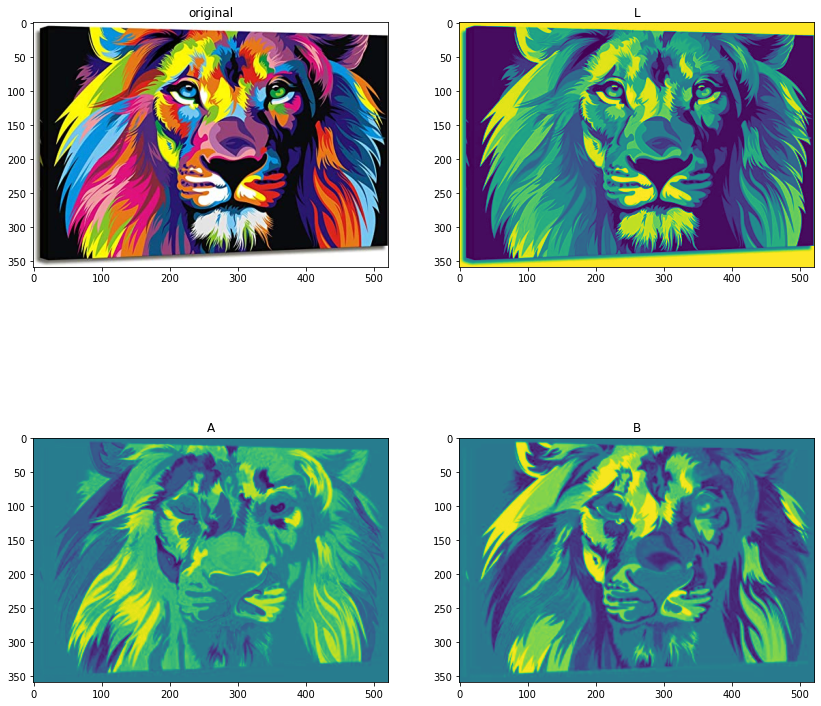

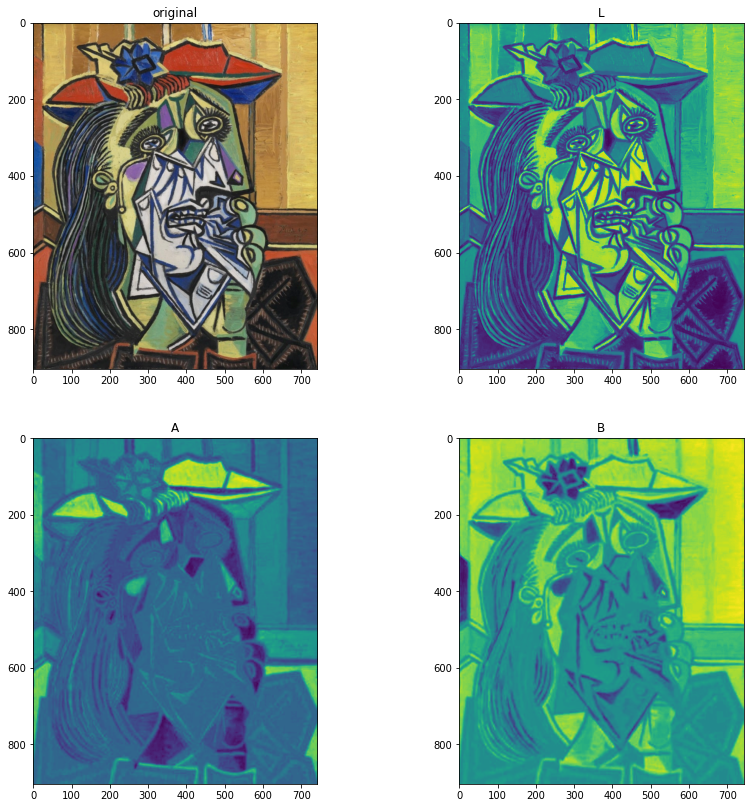

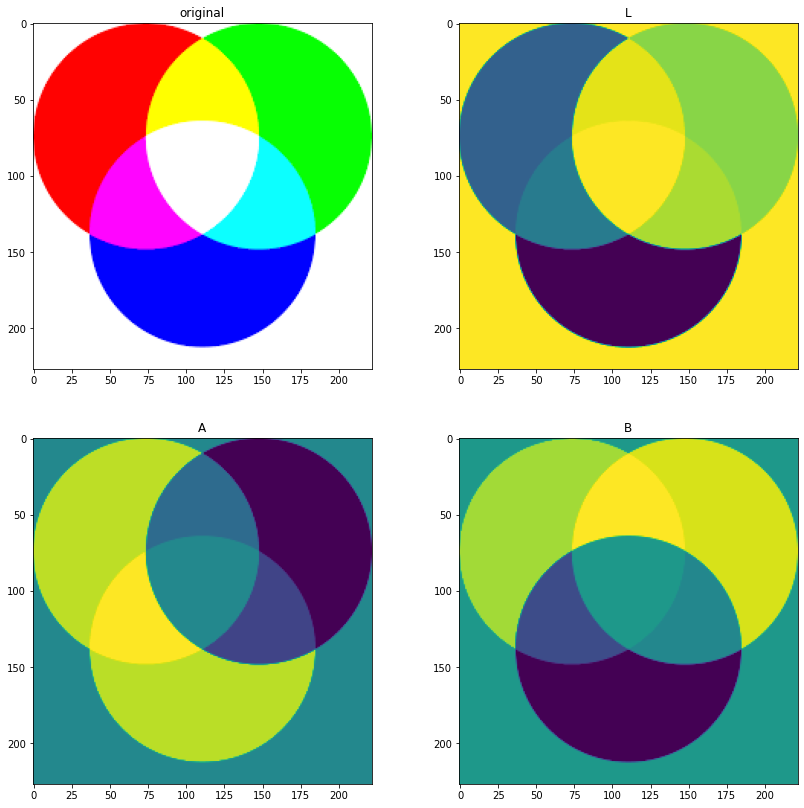

In [252]:
for img in imgs:
    mean_shift_analyze(img)